<a href="https://colab.research.google.com/github/hashmis79/SRAAssignments/blob/master/Masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

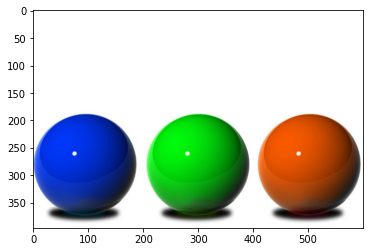

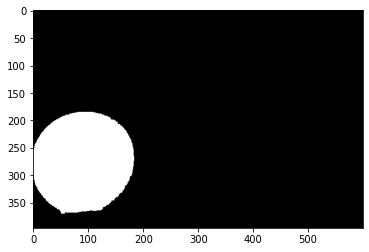

In [ ]:
import cv2
import numpy as np
import math as m
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def applyPadding(array):
  new = np.ones((array.shape[0]+6,array.shape[1]+6,array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+2,j+2,s] = array[i,j,s]
  return new


def dilation(matrix,option):
  kernel = np.zeros((7,7,1),dtype = matrix.dtype)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  padded = applyPadding(matrix)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        for x in range(kernel.shape[0]):
          for y in range(kernel.shape[1]):
            kernel[y,x] = padded[i+y,j+x,s]
        # print(kernel.max())
        if 255 in kernel and option == 1:
          filtered[i,j,s] = 255
        elif np.all(kernel) and option == 2:
          filtered[i,j,s] = 0
        else:
          filtered[i,j,s] = 0
  return filtered

def Masked(matrix,r1,g1,b1):
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      h = matrix[i,j,0]
      s = matrix[i,j,1]*100/255
      v = matrix[i,j,2]*100/255
      # if h > 0 and s > 0 and v != 250 and 300 > i > 200 and j <200 :
      #   print(i,j,'   ',h,s,v)

      # d = m.sqrt(m.pow(r1-r,2)+m.pow(g1-g,2)+m.pow(b1-b,2))  
      if  10 < v  and 40 < s  and 5 < h < 15 :
        filtered[i,j] = 255
      else:
        filtered[i,j] = 0
  return filtered   

image = cv2.imread('mask.jpg')
plt.imshow(image)
plt.show()
image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
r = 0
g = 0
b =255
# print(image)
filtered = Masked(image,r,g,b)

# print(filtered)
filtered = dilation(filtered,1)
# print(image[1,1,0])
plt.imshow(filtered)
plt.show()